In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm  

In [2]:
plastic=pd.read_csv("E:/Ravi_ExcelR_Assignments/Forecasting/PlasticSales.csv")
plastic

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [3]:
plastic["Date"] = pd.to_datetime(plastic.Month,format="%b-%y")
plastic

,Month,Sales,Date
0,Jan-49,742,2049-01-01
1,Feb-49,697,2049-02-01
2,Mar-49,776,2049-03-01
3,Apr-49,898,2049-04-01
4,May-49,1030,2049-05-01
5,Jun-49,1107,2049-06-01
6,Jul-49,1165,2049-07-01
7,Aug-49,1216,2049-08-01
8,Sep-49,1208,2049-09-01
9,Oct-49,1131,2049-10-01


In [4]:
plastic["month"] = plastic.Date.dt.strftime("%b") # month extraction
plastic["year"] = plastic.Date.dt.strftime("%Y") # year extraction

In [5]:
plastic

,Month,Sales,Date,month,year
0,Jan-49,742,2049-01-01,Jan,2049
1,Feb-49,697,2049-02-01,Feb,2049
2,Mar-49,776,2049-03-01,Mar,2049
3,Apr-49,898,2049-04-01,Apr,2049
4,May-49,1030,2049-05-01,May,2049
5,Jun-49,1107,2049-06-01,Jun,2049
6,Jul-49,1165,2049-07-01,Jul,2049
7,Aug-49,1216,2049-08-01,Aug,2049
8,Sep-49,1208,2049-09-01,Sep,2049
9,Oct-49,1131,2049-10-01,Oct,2049


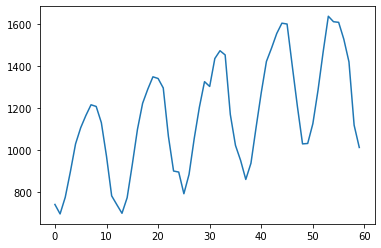

In [6]:
plastic.Sales.plot() 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022AFFAB3D60>]],
      dtype=object)

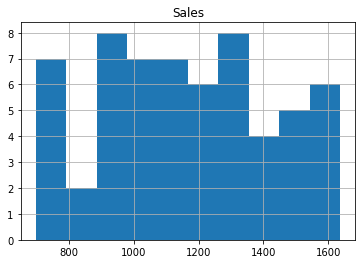

In [7]:
plastic.hist()

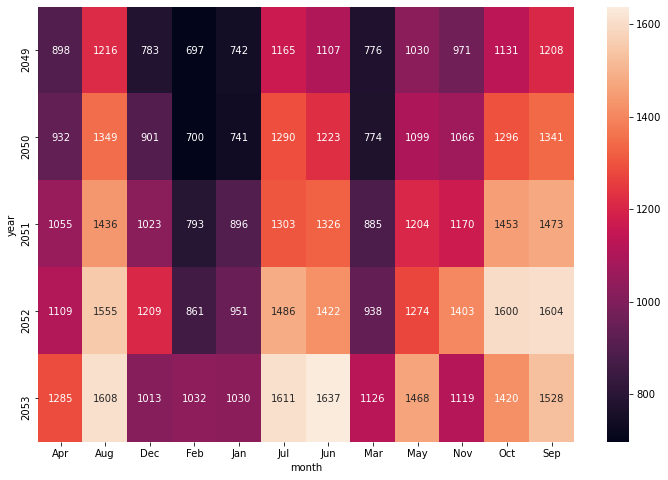

In [8]:
#For Heat Maps
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

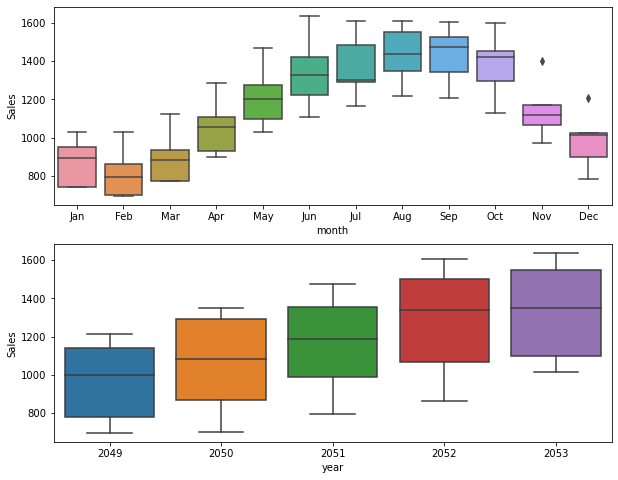

In [9]:
# Boxplot for month and year wise
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=plastic)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=plastic)

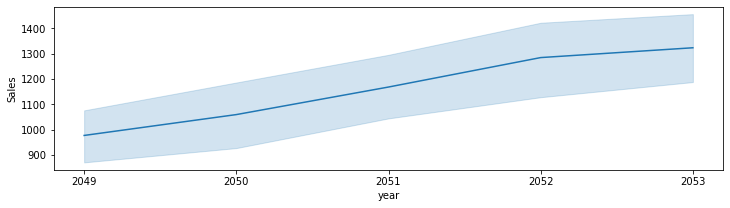

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=plastic) 

In [11]:
#filling categorical variable with dummy values
plastic=pd.get_dummies(plastic,columns=['month']) 
plastic 

,Month,Sales,Date,year,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,Jan-49,742,2049-01-01,2049,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,2049-02-01,2049,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,2049-03-01,2049,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,2049-04-01,2049,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,2049-05-01,2049,0,0,0,0,0,0,0,0,1,0,0,0
5,Jun-49,1107,2049-06-01,2049,0,0,0,0,0,0,1,0,0,0,0,0
6,Jul-49,1165,2049-07-01,2049,0,0,0,0,0,1,0,0,0,0,0,0
7,Aug-49,1216,2049-08-01,2049,0,1,0,0,0,0,0,0,0,0,0,0
8,Sep-49,1208,2049-09-01,2049,0,0,0,0,0,0,0,0,0,0,0,1
9,Oct-49,1131,2049-10-01,2049,0,0,0,0,0,0,0,0,0,0,1,0


In [12]:
plastic.columns

Index(['Month', 'Sales', 'Date', 'year', 'month_Apr', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Jun', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sep'],
      dtype='object')

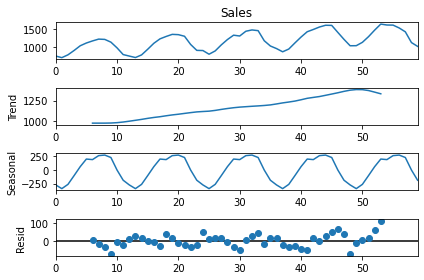

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(plastic.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

In [14]:
Train = plastic.head(50)
Test = plastic.tail(10)  

In [15]:
import statsmodels.formula.api as smf 

In [16]:
#Linear Model
linear_model = smf.ols('Sales~month_Apr',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['month_Apr'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

342.6926106955484

In [17]:
#Exponential

Exp = smf.ols('month_Apr~month_Aug',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['month_Aug'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

1397.660785597424

In [18]:
#Quadratic 

Quad = smf.ols('Sales~month_Aug+month_Apr',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["month_Aug","month_Apr"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

330.36402695530035

In [19]:
#Additive seasonality 

add_sea = smf.ols('Sales~month_Apr+month_Aug+month_Dec+month_Feb+month_Jan+month_Jul+month_Jun+month_Mar+month_May+month_Nov+month_Oct+month_Sep',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['month_Apr','month_Aug','month_Dec','month_Feb','month_Jan','month_Jul','month_Jun','month_Mar','month_May','month_Nov','month_Oct','month_Sep']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

235.4998142249804

In [20]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
3,rmse_add_sea,235.499814
2,rmse_Quad,330.364027
0,rmse_linear,342.692611
1,rmse_Exp,1397.660786
